In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from google.colab.patches import cv2_imshow

In [4]:
#load train and test
mainDIR = os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)')
print(mainDIR)

['train', 'val', 'test']


In [3]:
from sklearn.model_selection import train_test_split
#split data into train 80% validation 10% test 
#concat all data
X = np.concatenate((X_tr, X_te), axis=0)
Y = np.concatenate((Y_tr, Y_te), axis=0)

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [4]:
from prettytable import PrettyTable
#statistics
num_train_normal = np.count_nonzero(y_train == 0)
num_valid_normal = np.count_nonzero(y_valid == 0)
num_test_normal = np.count_nonzero(y_test == 0)

num_train_pneumonia = np.count_nonzero(y_train == 1)
num_valid_pneumonia = np.count_nonzero(y_valid == 1)
num_test_pneumonia = np.count_nonzero(y_test == 1)

TOT_train = num_train_normal + num_train_pneumonia
TOT_test =  num_test_normal + num_test_pneumonia
TOT_valid = num_valid_normal + num_valid_pneumonia
#table stat
t = PrettyTable(['Class','Train','Validation', 'Test'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal])
t.add_row(['Pneumonia',num_train_pneumonia,num_valid_pneumonia,num_test_pneumonia])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test])
print(t)

+-----------+-------+------------+------+
|   Class   | Train | Validation | Test |
+-----------+-------+------------+------+
|   Normal  |  1095 |    221     | 267  |
| Pneumonia |  3004 |    657     | 612  |
|   Total   |  4099 |    878     | 879  |
+-----------+-------+------------+------+


In [ ]:
#get noraml (0) Xray images from the train
noramals_indexes = np.where(y_train == 0 )[0]
normals_train = []
y_normal_train = []
for i in noramals_indexes :
    radio = X_train[i] 
    normals_train.append(radio)
    y_normal_train.append(0)
normals_train = np.array(normals_train)
y_normal_train = np.array(y_normal_train)

In [ ]:
#data augmentation [close the gap] between Normal and pneumnia (we work only on train)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    shear_range = 20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
#generate augmented data
normal_train_generator = datagen.flow(
       normals_train,y_normal_train,batch
)
print(type(normal_train_generator))

<class 'keras.preprocessing.image.NumpyArrayIterator'>


In [ ]:
generated_x = np.concatenate([normal_train_generator.next()[0] for i in range(normal_train_generator.__len__())])
generated_y = np.concatenate([normal_train_generator.next()[1] for i in range(normal_train_generator.__len__())])

X_train_aug = np.concatenate((X_train, generated_x), axis=0)
y_train_aug = np.concatenate((y_train, generated_y), axis=0)

In [ ]:
#statistics after augmentation [closing the gap between Normal and pneumnia]
num_train_normal = np.count_nonzero(y_train_aug == 0)
num_valid_normal = np.count_nonzero(y_valid == 0)
num_test_normal = np.count_nonzero(y_test == 0)

num_train_pneumonia = np.count_nonzero(y_train_aug == 1)
num_valid_pneumonia = np.count_nonzero(y_valid == 1)
num_test_pneumonia = np.count_nonzero(y_test == 1)

TOT_train = num_train_normal + num_train_pneumonia
TOT_test =  num_test_normal + num_test_pneumonia
TOT_valid = num_valid_normal + num_valid_pneumonia
#table stat
t = PrettyTable(['Class','Train','Validation', 'Test'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal])
t.add_row(['Pneumonia',num_train_pneumonia,num_valid_pneumonia,num_test_pneumonia])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test])
print(t)

+-----------+-------+------------+------+
|   Class   | Train | Validation | Test |
+-----------+-------+------------+------+
|   Normal  |  2186 |    242     | 248  |
| Pneumonia |  3006 |    636     | 631  |
|   Total   |  5192 |    878     | 879  |
+-----------+-------+------------+------+


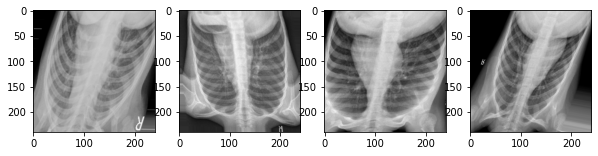

In [ ]:
#plot
fig = plt.figure(figsize=(10, 10))
columns = 4 
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train_aug[5000+i]/255)
plt.show()

In [ ]:
#save the datasets
#the augmentation will be done while training
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmenting while training/X_train',X_train)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmenting while training/y_train',y_train)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmenting while training/X_valid',X_valid)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmenting while training/y_valid',y_valid)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmenting while training/X_test',X_test)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmenting while training/y_test',y_test)

# Augmented data to close the gap

np.save('/content/drive/MyDrive/train & test 5k (us)/Augmented to close the gap/X_train_aug',X_train_aug)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmented to close the gap/y_train_aug',y_train_aug)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmented to close the gap/X_valid',X_valid)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmented to close the gap/y_valid',y_valid)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmented to close the gap/X_test',X_test)
np.save('/content/drive/MyDrive/train & test 5k (us)/Augmented to close the gap/y_test',y_test)